# Analyzing the Impact of Recession on Automobile Sales

In [1]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Importing Data

In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### Creating Visualizations for Data Analysis


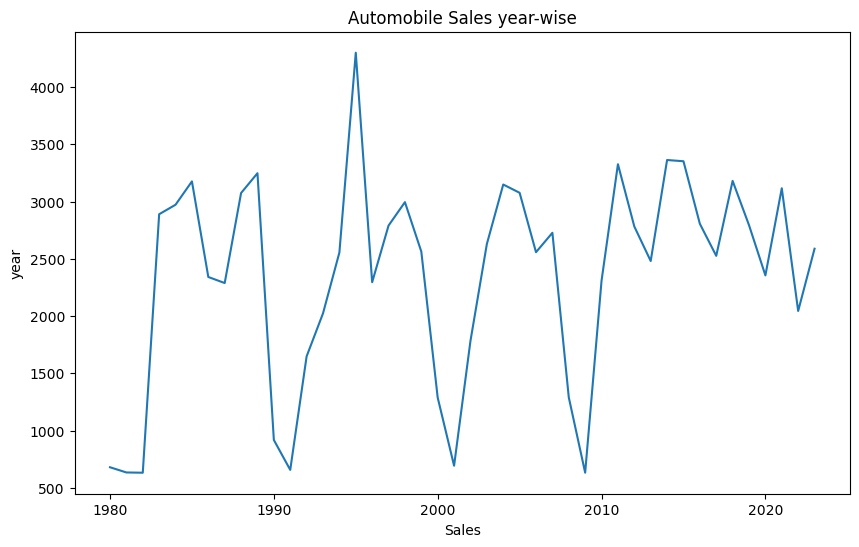

In [6]:
# Display year by year fluctuation of automobile sales
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Sales')
plt.ylabel('year')
plt.title('Automobile Sales year-wise')
plt.show()

Providing more clarity on years.


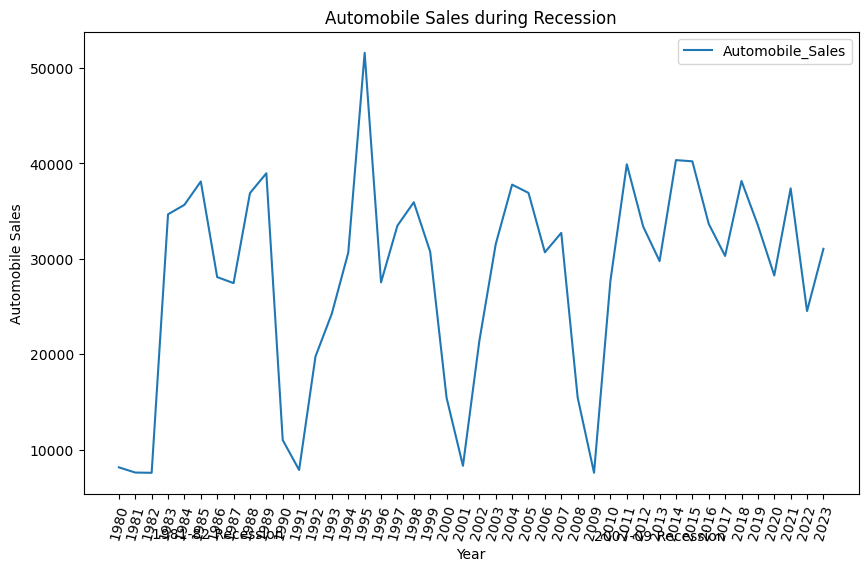

In [7]:
plt.figure(figsize=(10, 6))
df_line = df.groupby('Year')['Automobile_Sales'].sum() 
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2009, 500, '2007-09 Recession')  
plt.legend()
plt.show()

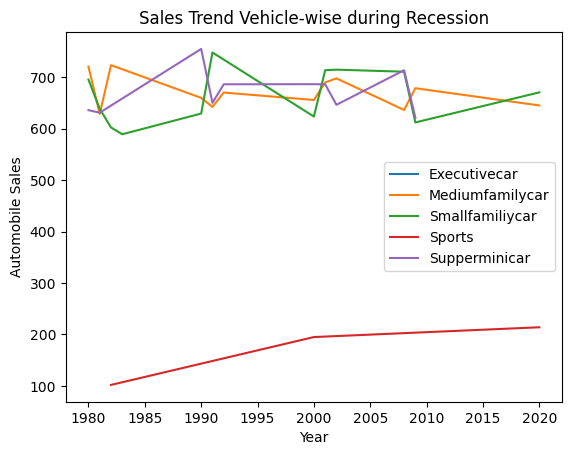

In [8]:
# Sales trends for different vehicle types during recession periods
df_rec = df[df['Recession'] == 1]

df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)

df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

Sales of Supperminicar steadily increased throughout the recession period while the sales of Mediumfamilycar, Smallfamilycar, and Sports fluctuated over time without a clear trend.

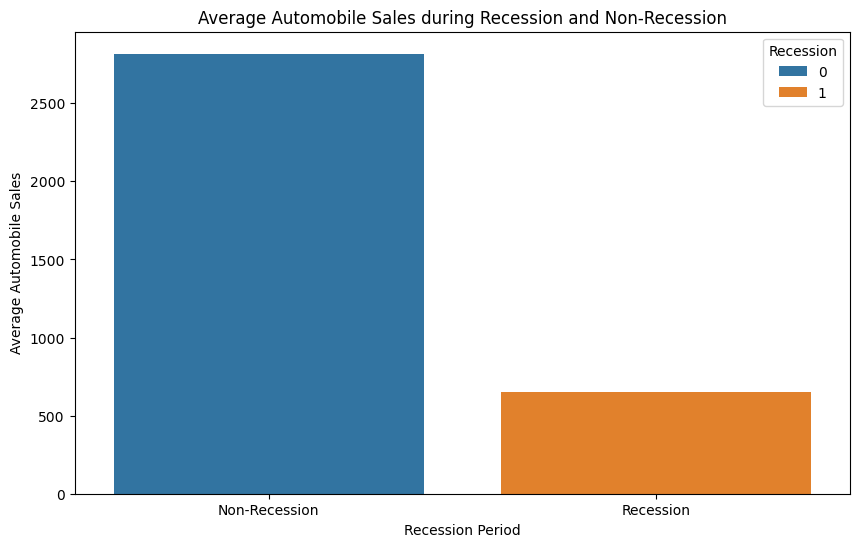

In [9]:
# Compare the sales trend per vehicle type for a recession period with a non-recession period.
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Recession Period')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

Compare the sales of different vehicle types during a recession and a non-recession period

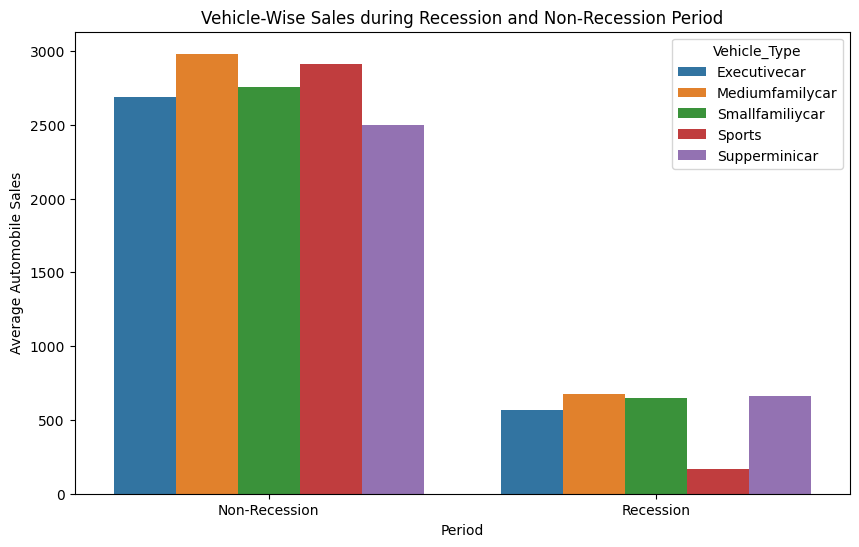

In [10]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

# Calculate the mean sales volume by vehicle type during recession and non-recession periods
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

Thus, there is a drastic decline in the overall sales of the automobiles during recession. However, the most affected type of vehicle is executivecar and sports.

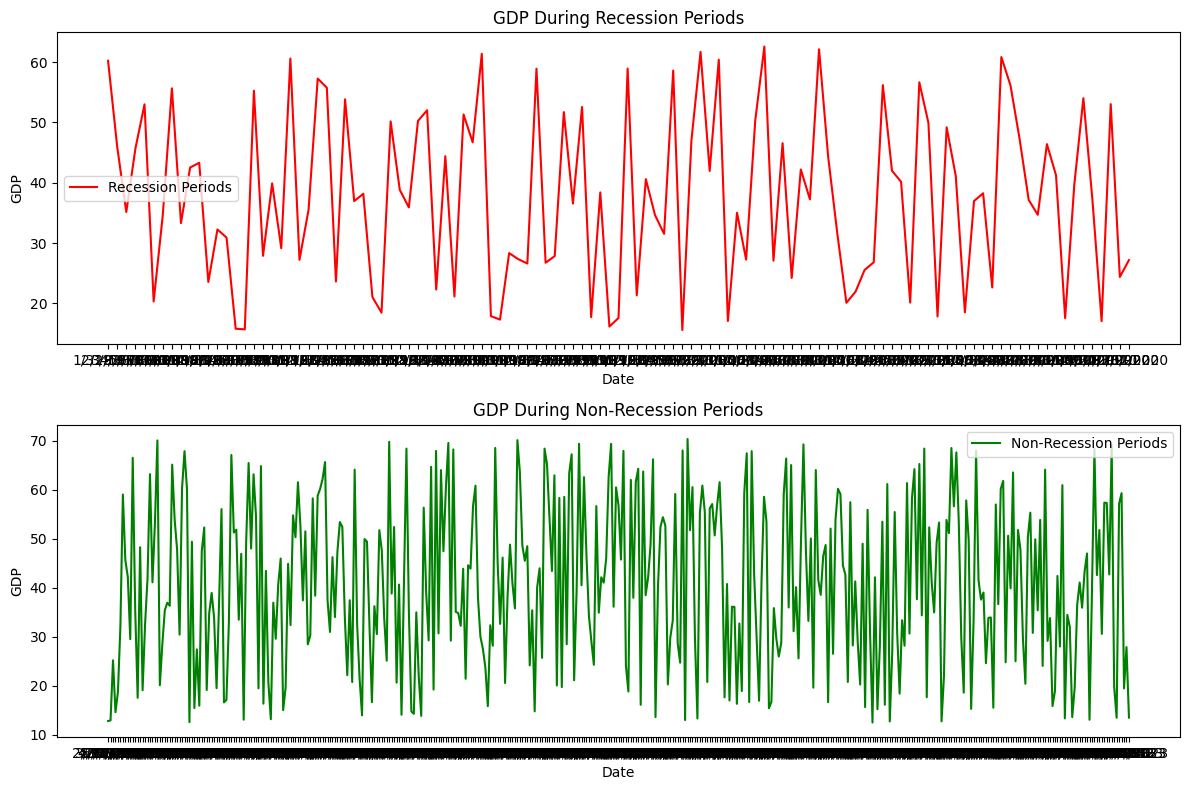

In [11]:
# Compare the variations in GDP during recession and non-recession period:
recession_periods = df[df['Recession'] == 1]
non_recession_periods = df[df['Recession'] == 0]

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Plotting GDP during recession periods
ax[0].plot(recession_periods['Date'], recession_periods['GDP'], label='Recession Periods', color='red')
ax[0].set_title('GDP During Recession Periods')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('GDP')
ax[0].legend()

# Plotting GDP during non-recession periods
ax[1].plot(non_recession_periods['Date'], non_recession_periods['GDP'], label='Non-Recession Periods', color='green')
ax[1].set_title('GDP During Non-Recession Periods')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('GDP')
ax[1].legend()

plt.tight_layout()
plt.show()

From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company.

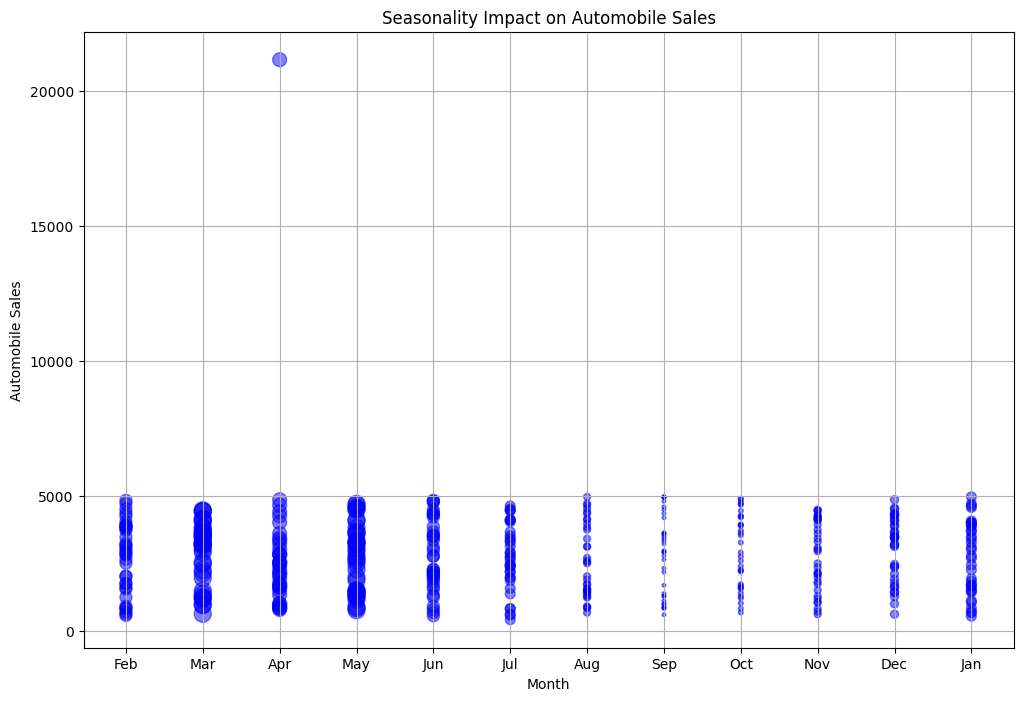

In [12]:
# Display the impact of seasonality on Automobile Sales.

non_recession_years = df[df['Recession'] == 0]

plt.figure(figsize=(12, 8))
plt.scatter(non_recession_years['Month'], non_recession_years['Automobile_Sales'], 
            s=non_recession_years['Seasonality_Weight']*100, alpha=0.5, color='blue')

plt.title('Seasonality Impact on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.savefig('Bubble.png')
plt.show()

From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April.

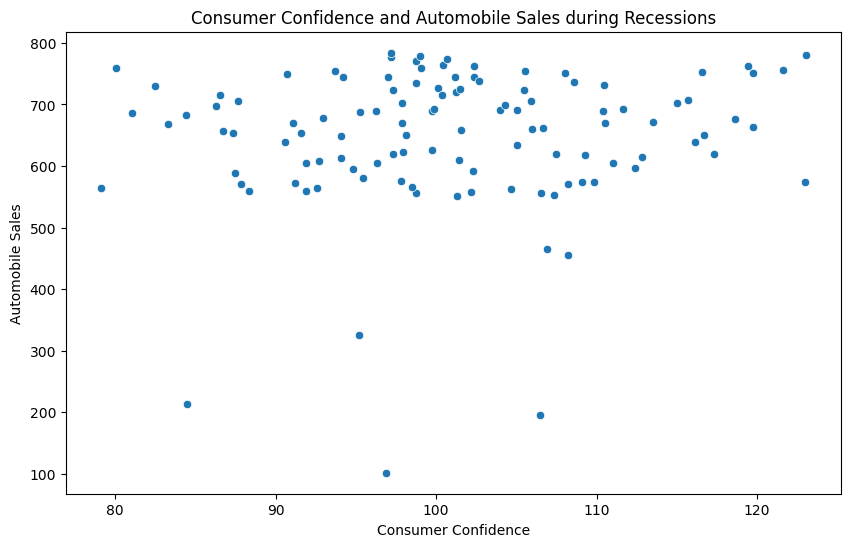

In [13]:
# Scatter plot for Consumer Confidence and Automobile Sales during Recessions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['Recession'] == 1], x='Consumer_Confidence', y='Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.savefig('Scatter_Consumer_Confidence.png')
plt.show()

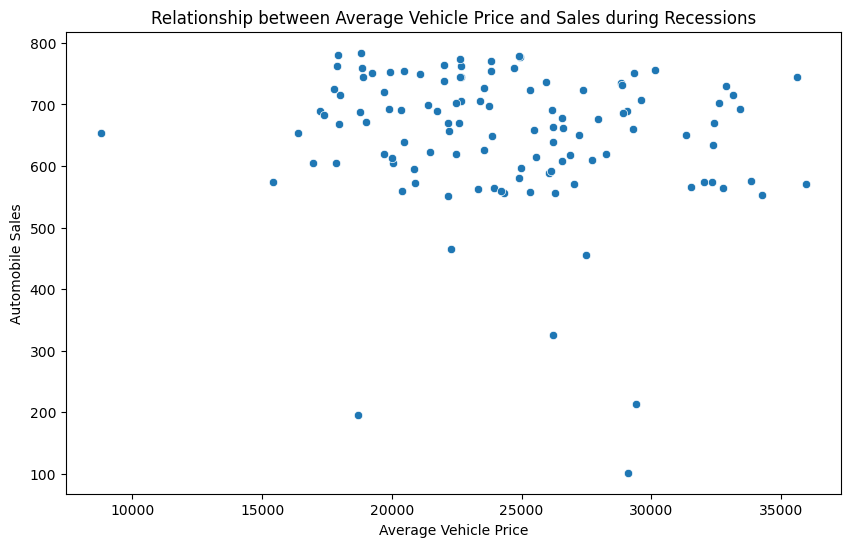

In [14]:
# Scatter plot for Average Vehicle Price and Sales during Recessions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['Recession'] == 1], x='Price', y='Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.savefig('Scatter_Average_Price.png')
plt.show()

Inference: There is not much relation!

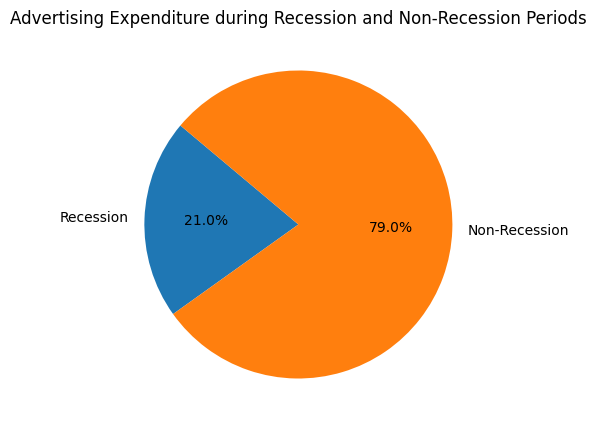

In [15]:
# Pie chart for Advertising Expenditure during Recession and Non-Recession Periods
ad_exp_recession = df[df['Recession'] == 1]['Advertising_Expenditure'].sum()
ad_exp_non_recession = df[df['Recession'] == 0]['Advertising_Expenditure'].sum()

labels = ['Recession', 'Non-Recession']
sizes = [ad_exp_recession, ad_exp_non_recession]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.savefig('Pie_Ad_Expenditure.png')
plt.show()

It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!

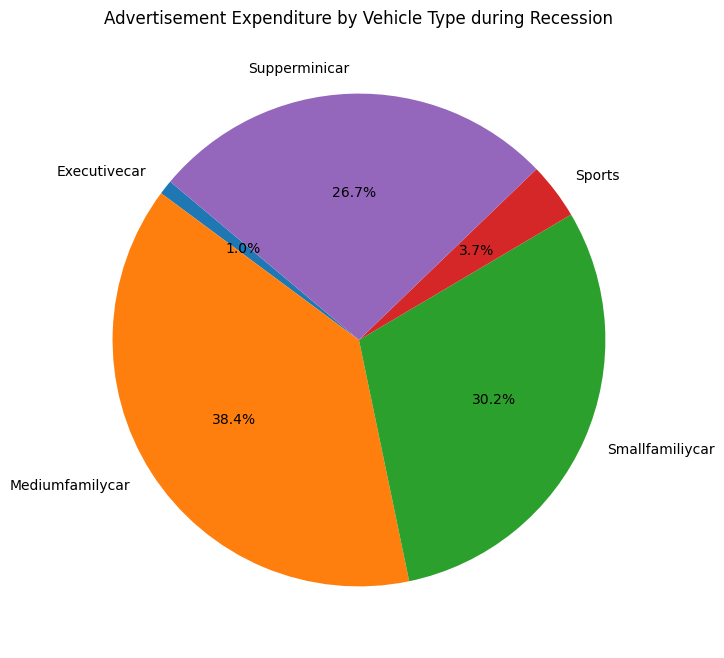

In [16]:
# Pie chart for Advertisement Expenditure by Vehicle Type during Recession
ad_exp_by_vehicle = df[df['Recession'] == 1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 8))
ad_exp_by_vehicle.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Advertisement Expenditure by Vehicle Type during Recession')
plt.ylabel('')
plt.savefig('Pie_Ad_Expenditure_Vehicle.png')
plt.show()

During recession the advertisements were mostly focued on low price range vehicle. A wise decision!

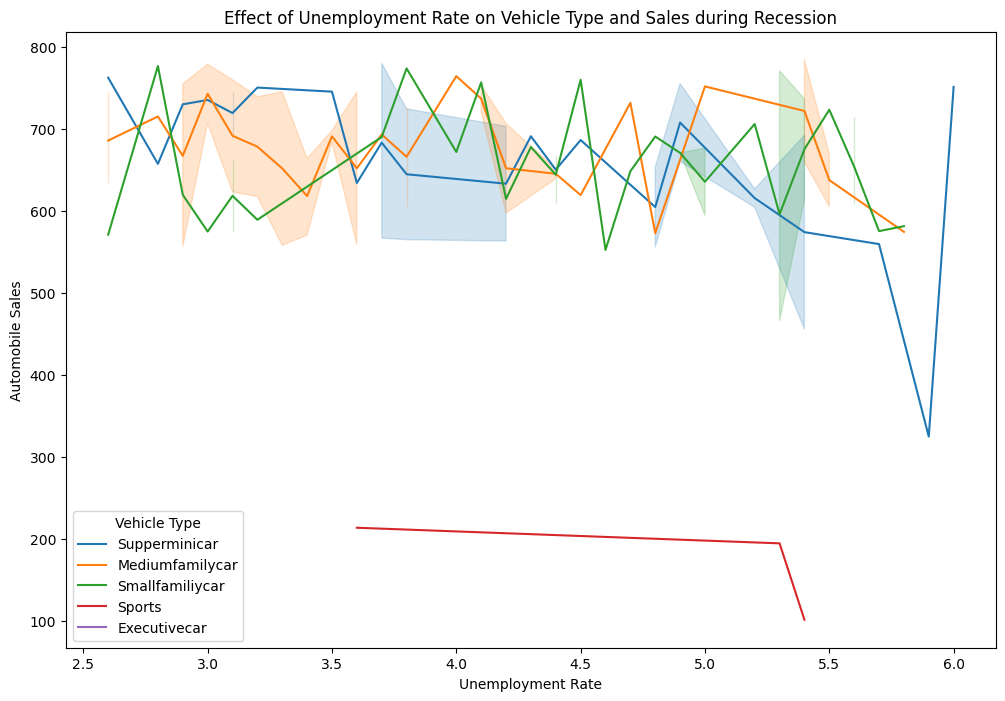

In [17]:
# Analyzing the effect of Unemployment Rate on Vehicle Type and Sales during Recession
plt.figure(figsize=(12, 8))
sns.lineplot(data=df[df['Recession'] == 1], x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recession')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type')
plt.savefig('Line_Unemployment_Vehicle_Sales.png')
plt.show()

Create a map on the hightest sales region/offices of the company during recession period


In [18]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

In [21]:
# Filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1